# **Atividade 2: Beer Consumption - Sao Paulo**
## D1DAE: Análise Estatística para Ciência de Dados    
## IFSP Campinas

**Importando as bibliotecas**

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 📊 1. Análise Exploratória

O arquivo considerando neste notebook encontra-se aqui;

https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

### 1.1. Importando o dataset e mostrando informações básicas

In [125]:
df = pd.read_csv('datasets/Consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observação 1:** Existem registros/amostras com valores nulos em todas as colunas.

Qual seria a proporção desses valores no dataset como um todo?

In [126]:
# Ordenando todas as colunas decrescentemente
df_ordened = df.sort_values(
                                ["Data", "Temperatura Media (C)", "Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)", "Final de Semana", "Consumo de cerveja (litros)"]
                                ,ascending=[
                                    False
                                    ,False
                                    ,False
                                    ,False
                                    ,False
                                    ,False
                                    ,False
                                ]
                            )

# Pegando informações do data frame
df_ordened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941 entries, 364 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 58.8+ KB


**Vamos contar quantas linhas/amostras nulas existem**

In [127]:
# Contar os valores nulos em cada coluna
valores_nulos_por_coluna = df_ordened.isnull().sum()

# Contar os valores nulos em todo o DataFrame
total_valores_nulos = df_ordened.isnull().sum().sum()

# Exibir o resultado
print(valores_nulos_por_coluna)
print(total_valores_nulos)

nulas_data = df_ordened['Data'].isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64
4032


In [128]:
print('Este dataset tem {:.0f} atributos/colunas e {:.0f} linhas/amostras das quais, {:.0f} são linhas/amostras nulas.\nLogo, temos uma inconsistência de {:.2f}%'.format(df_ordened.shape[1], df_ordened.shape[0], nulas_data, (nulas_data/df_ordened.shape[0])*100 ))



Este dataset tem 7 atributos/colunas e 941 linhas/amostras das quais, 576 são linhas/amostras nulas.
Logo, temos uma inconsistência de 61.21%


### 1.2.1 Transformando o dataset

In [129]:
print('Vamos deletar as linhas/amostras nulas, a fim de melhorar a consistência do dataset.')

df.dropna(inplace = True)

df

Vamos deletar as linhas/amostras nulas, a fim de melhorar a consistência do dataset.


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


**Agora vamos tranformar o dataset, alterando os tipos de cada coluna quando necessário**

In [130]:
# Vamos tranformar os valores das colunas de Temperatura Media (C), Temperatura Minima (C), Temperatura Maxima (C)
# e Precipitacao (mm) em float64
# A coluna 'Final de Semana' assume valores 0 ou 1. Logo iremos colocar essa variável como categórica
df['Data'] = pd.to_datetime(df['Data'].astype('str'), format='%Y-%m-%d')
df['Temperatura Media (C)'] = pd.to_numeric(df['Temperatura Media (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Minima (C)'] = pd.to_numeric(df['Temperatura Minima (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Maxima (C)'] = pd.to_numeric(df['Temperatura Maxima (C)'].str.replace(',', '.'), errors='coerce')
df['Precipitacao (mm)'] = pd.to_numeric(df['Precipitacao (mm)'].str.replace(',', '.'), errors='coerce')
df['Final de Semana'] = df['Final de Semana'].astype('category')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    category      
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 20.4 KB


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


**Vamos dividir a base em treino e teste antes da análise exploratória para não se tomar alguma decisão baseado nos dados de testeo**

In [131]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### 1.3. Estatísticas

In [132]:
train_data.describe()


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
count,292,292.000000,292.000000,292.000000,292.000000,292.000000
mean,2015-07-03 14:57:32.054794496,21.103699,17.317466,26.461986,5.161301,25.173113
min,2015-01-02 00:00:00,12.900000,10.600000,14.500000,0.000000,14.343000
25%,2015-04-09 18:00:00,18.735000,15.175000,23.675000,0.000000,22.026000
50%,2015-07-03 00:00:00,21.260000,17.600000,26.600000,0.000000,24.704500
75%,2015-09-29 06:00:00,23.145000,19.500000,29.225000,3.400000,28.406500
max,2015-12-31 00:00:00,28.860000,24.500000,36.500000,85.300000,37.690000
std,NaN,3.232581,2.882571,4.348546,12.160690,4.288006


<Axes: xlabel='Final de Semana', ylabel='Consumo de cerveja (litros)'>

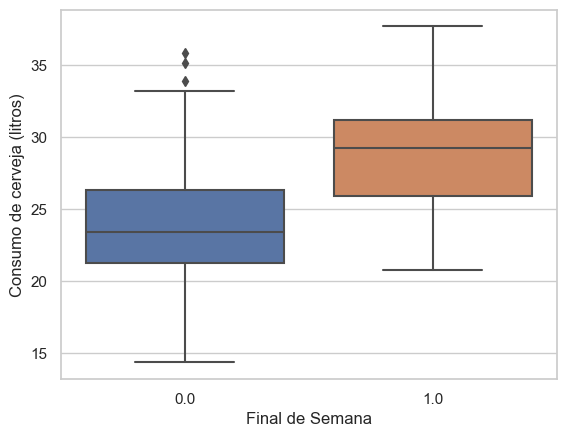

In [133]:
sns.boxplot(data=train_data, y='Consumo de cerveja (litros)', x='Final de Semana')

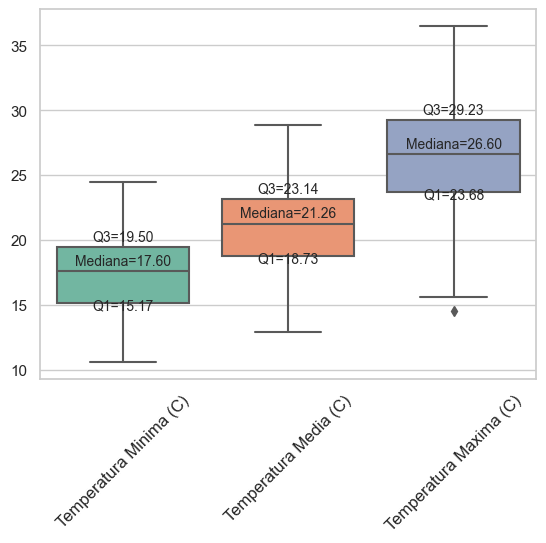

In [134]:
# Fazendo BoxPlot das variáveis de Temperatura

sns.set(style="whitegrid")
ax = sns.boxplot(data=train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']], orient="v", palette="Set2")
ax.tick_params(axis='x', labelsize=12, rotation=45)

medians = train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']].median().values

for i, col in enumerate(train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']].columns):
    x_pos = i
    median_val = medians[i]
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    ax.text(x_pos, median_val + 0.5, f'Mediana={medians[i]:.2f}', ha='center', fontsize=10)
    ax.text(x_pos, q1 - 0.5, f'Q1={q1:.2f}', ha='center', fontsize=10)
    ax.text(x_pos, q3 + 0.5, f'Q3={q3:.2f}', ha='center', fontsize=10)

<Axes: xlabel='Precipitacao (mm)', ylabel='Count'>

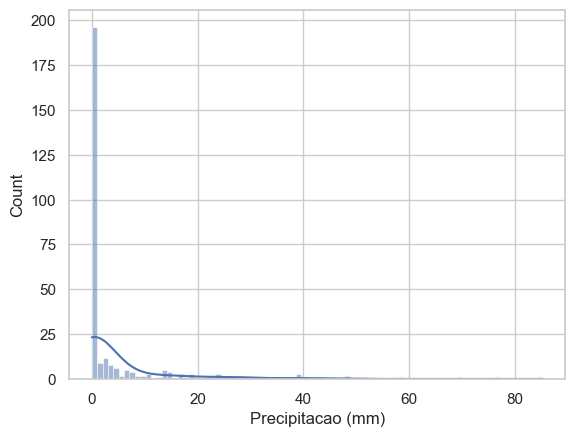

In [135]:
# Fazendo o plot da distribuição da variável Precipitacao

sns.histplot(data=train_data, x="Precipitacao (mm)", kde=True)

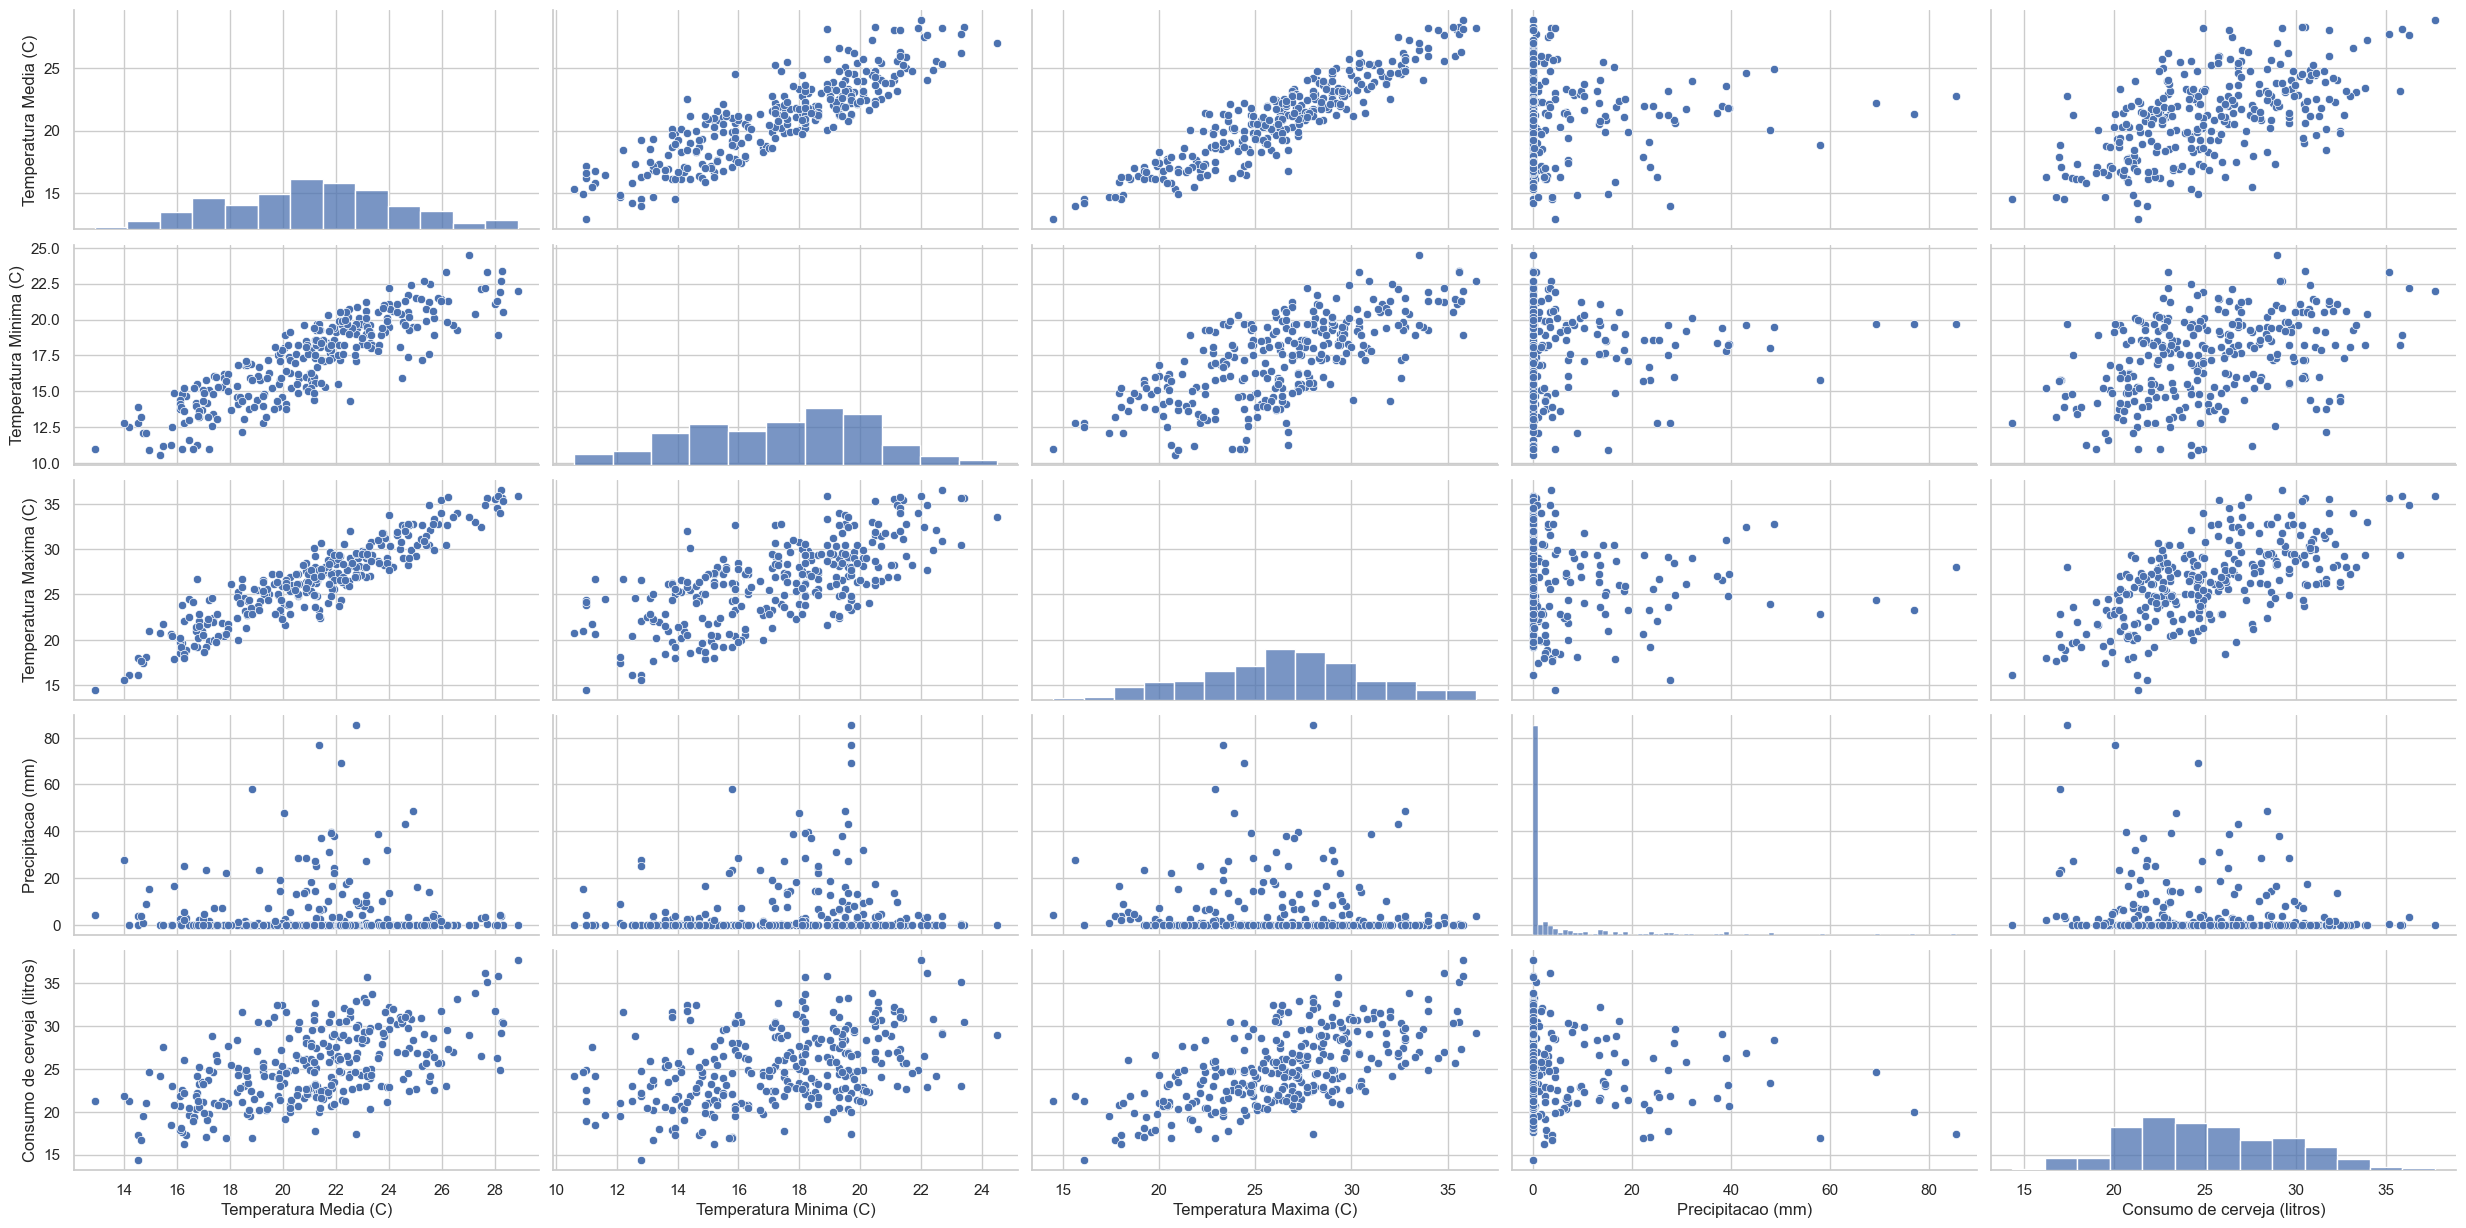

In [136]:
sns.pairplot(train_data, aspect=2)


**Observação 2:**  Perceba que, em relação ao consumo de cerveja, há relações lineares entre as Temperaturas Média, Mínima e Máxima. Em relação a Precipitacao (mm) podemos considerar que quanto menor precipitação, maior a frequência de consumo de cerveja e maior também os valores desse consumo. Podemos notar também que o consumo de cerveja descreve uma distribuição aproximadamente normal com uma média de ~25 litros

### 1.4 Correlation Matrix

<Axes: >

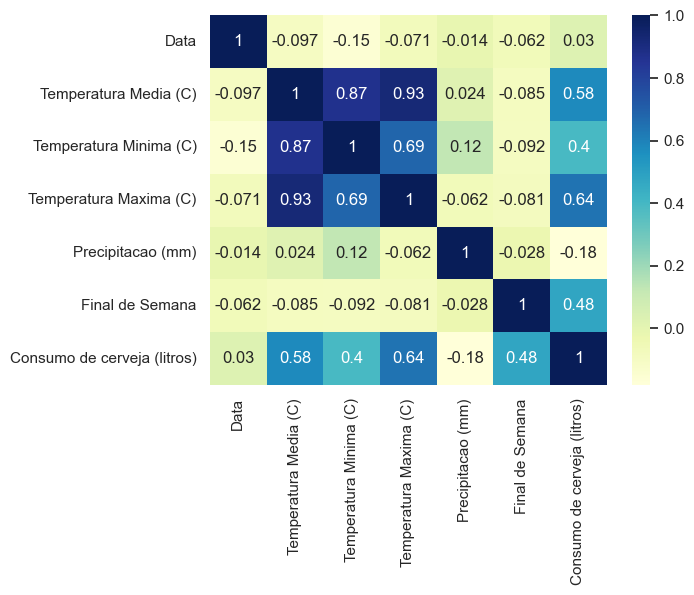

In [137]:
# Fazendo o plot da matriz de correlação entre as variáveis contínuas

correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [138]:
train_data.corr()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,1.000000,-0.096727,-0.153524,-0.071339,-0.013641,-0.062231,0.029571
Temperatura Media (C),-0.096727,1.000000,0.867746,0.925173,0.024371,-0.085089,0.579956
Temperatura Minima (C),-0.153524,0.867746,1.000000,0.685031,0.123925,-0.092291,0.395098
Temperatura Maxima (C),-0.071339,0.925173,0.685031,1.000000,-0.061902,-0.081285,0.642715
Precipitacao (mm),-0.013641,0.024371,0.123925,-0.061902,1.000000,-0.027940,-0.180915
Final de Semana,-0.062231,-0.085089,-0.092291,-0.081285,-0.027940,1.000000,0.476764
Consumo de cerveja (litros),0.029571,0.579956,0.395098,0.642715,-0.180915,0.476764,1.000000


## 2. Dependent Variable (y) vs Independent Variables

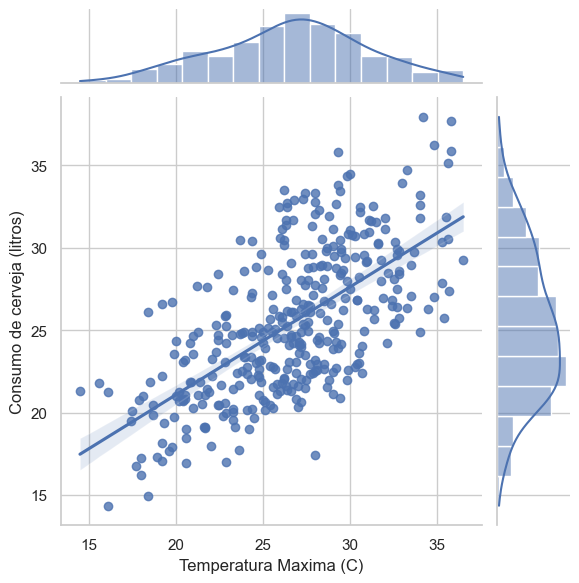

In [139]:
sns.jointplot(data=df, x='Temperatura Maxima (C)', y='Consumo de cerveja (litros)', kind='reg')

<Axes: xlabel='Precipitacao (mm)', ylabel='Count'>

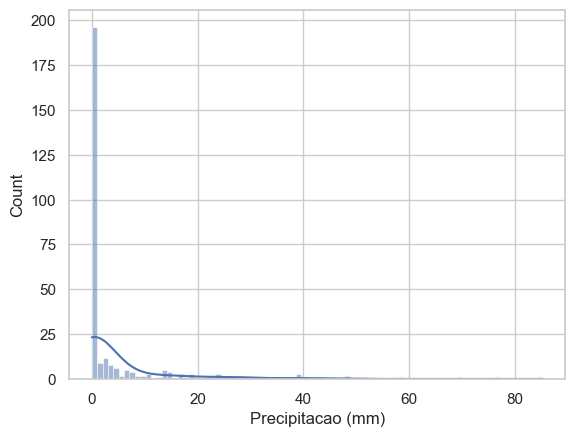

In [140]:
# Fazendo o plot da distribuição da variável Precipitacao

sns.histplot(data=train_data, x="Precipitacao (mm)", kde=True)

In [141]:
import plotly.express as px

fig = px.scatter_3d(df, x='Precipitacao (mm)', y='Temperatura Maxima (C)', z='Consumo de cerveja (litros)', width=1000, height=1000)
fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
fig.show()

In [142]:
fig = px.scatter_3d(df, x='Temperatura Maxima (C)', y='Final de Semana', z='Consumo de cerveja (litros)', width=1000, height=1000)
fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
fig.show()

In [143]:
fig = px.scatter_3d(df, x='Precipitacao (mm)', y='Final de Semana', z='Consumo de cerveja (litros)', width=1000, height=1000)
fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
fig.show()

## 🤖 3. Regressão Linear

### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [144]:
# Treinando a regressão linear e calculando como métrica do treino o MSE

regressor = LinearRegression()

regressor.fit(train_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']], train_data['Consumo de cerveja (litros)'])

y_pred_train = regressor.predict(train_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']])

mse_train = mean_squared_error(train_data['Consumo de cerveja (litros)'], y_pred_train)

print('Erro quadrado médio - treino:', round(mse_train,3))

Erro quadrado médio - treino: 5.307


In [145]:
# Printando os coefientes:

vars = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']

for i, j in enumerate(regressor.coef_):
    print(f'''Coeficiente da variável {vars[i]}: {round(j,5)} ''')

print(f'''Coeficiente Linear (Bias): {round(regressor.intercept_, 5)} ''')

Coeficiente da variável Temperatura Media (C): 0.09651 
Coeficiente da variável Temperatura Minima (C): -0.06282 
Coeficiente da variável Temperatura Maxima (C): 0.63069 
Coeficiente da variável Precipitacao (mm): -0.04341 
Coeficiente da variável Final de Semana: 5.14719 
Coeficiente Linear (Bias): 6.41926 


In [146]:
# Fazendo predição dos valores e calculando como métrica do teste o MSE

y_pred = regressor.predict(test_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']])

mse_test = mean_squared_error(test_data['Consumo de cerveja (litros)'], y_pred)

print('Erro quadrado médio - teste:', round(mse_test,3))

Erro quadrado médio - teste: 5.699


In [147]:
# Plotando os dados reais versus dados preditos

test_data['Consumo_Pred'] = y_pred

Text(0, 0.5, 'Valor predito')

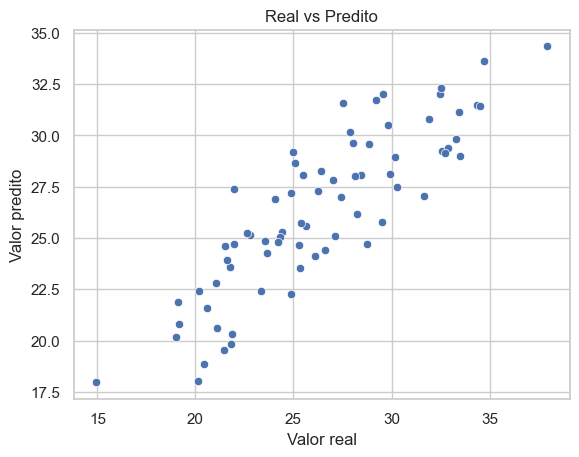

In [148]:
sns.scatterplot(x='Consumo de cerveja (litros)', y='Consumo_Pred', data=test_data)
plt.title('Real vs Predito')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')